### Importações

Importação das bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

Importação do dataset e exibição de suas colunas

In [3]:
# Importar dataset e mostrar suas colunas
df = pd.read_csv("student_habits_performance.csv", delimiter=',')

### Análise exploratória

In [4]:
#Análise das colunas
print(df.columns)

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


In [5]:
#Análise dos valores das notas dos estudantes
df['exam_score'].describe()

count    1000.000000
mean       69.601500
std        16.888564
min        18.400000
25%        58.475000
50%        70.500000
75%        81.325000
max       100.000000
Name: exam_score, dtype: float64

Temos 1000 alunos, com uma média de notas de 69.60

In [6]:
#Análise de uma amostra dos dados
df.head(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Codificação das colunas categóricas

In [7]:
#desconsiderar o id dos alunos
df_clean = df.drop('student_id', axis=1)
#codificar os valores categóricos -> gender, part_time_job, diet_quality, parental_education_level, internet quality e extracurricular_participation

#"Label encoding"
# Poor=0, Fair=1, Good=2
mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
}

# Aplicar o mapeamento
df['diet_quality_encoded'] = df['diet_quality'].map(mapping)


'''print(df_clean)
print()'''

#parental_education_level -> 2 = Master, 0 = Highschool, 1 = Bachelor
mapping = {
    'Highschool': 0,
    'Bachelor': 1,
    'Master': 2,
}

# Aplicar mapeamento
df_clean['parental_education_level_encoded'] = df_clean['parental_education_level'].map(mapping)

'''print(df_clean)
print()'''

#internet_quality -> 0 = poor, 1 = average, 2 = good
# Criar dicionário de mapeamento
mapping = {
    'Poor': 0,
    'Average': 1,
    'Good': 2,
}

# Aplicar mapeamento
df_clean['internet_quality_encoded'] = df_clean['internet_quality'].map(mapping)

'''print(df_clean)
print()'''


#gender -> 0 = Male, 1 = Female
# Codificar
df_clean['gender_encoded'] = (df_clean['gender'] == 'Female').astype(int)


'''print(df_clean)
print()'''

#part_time_job -> 0 = No, 1 = Yes
# Codificar
df_clean['part_time_job_encoded'] = (df_clean['part_time_job'] == 'Yes').astype(int)

'''print(df_clean)
print()'''

#extracurricular_participation -> 0 = No, 1 = Yes
# Codificar
df_clean['extracurricular_participation_encoded'] = (df_clean['extracurricular_participation'] == 'Yes').astype(int)

'''print(df_clean)
print()'''

df_clean = df_clean.drop(['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation'], axis = 1)

print(df_clean)

     age  study_hours_per_day  social_media_hours  netflix_hours  \
0     23                  0.0                 1.2            1.1   
1     20                  6.9                 2.8            2.3   
2     21                  1.4                 3.1            1.3   
3     23                  1.0                 3.9            1.0   
4     19                  5.0                 4.4            0.5   
..   ...                  ...                 ...            ...   
995   21                  2.6                 0.5            1.6   
996   17                  2.9                 1.0            2.4   
997   20                  3.0                 2.6            1.3   
998   24                  5.4                 4.1            1.1   
999   19                  4.3                 2.9            1.9   

     attendance_percentage  sleep_hours  exercise_frequency  \
0                     85.0          8.0                   6   
1                     97.3          4.6                  

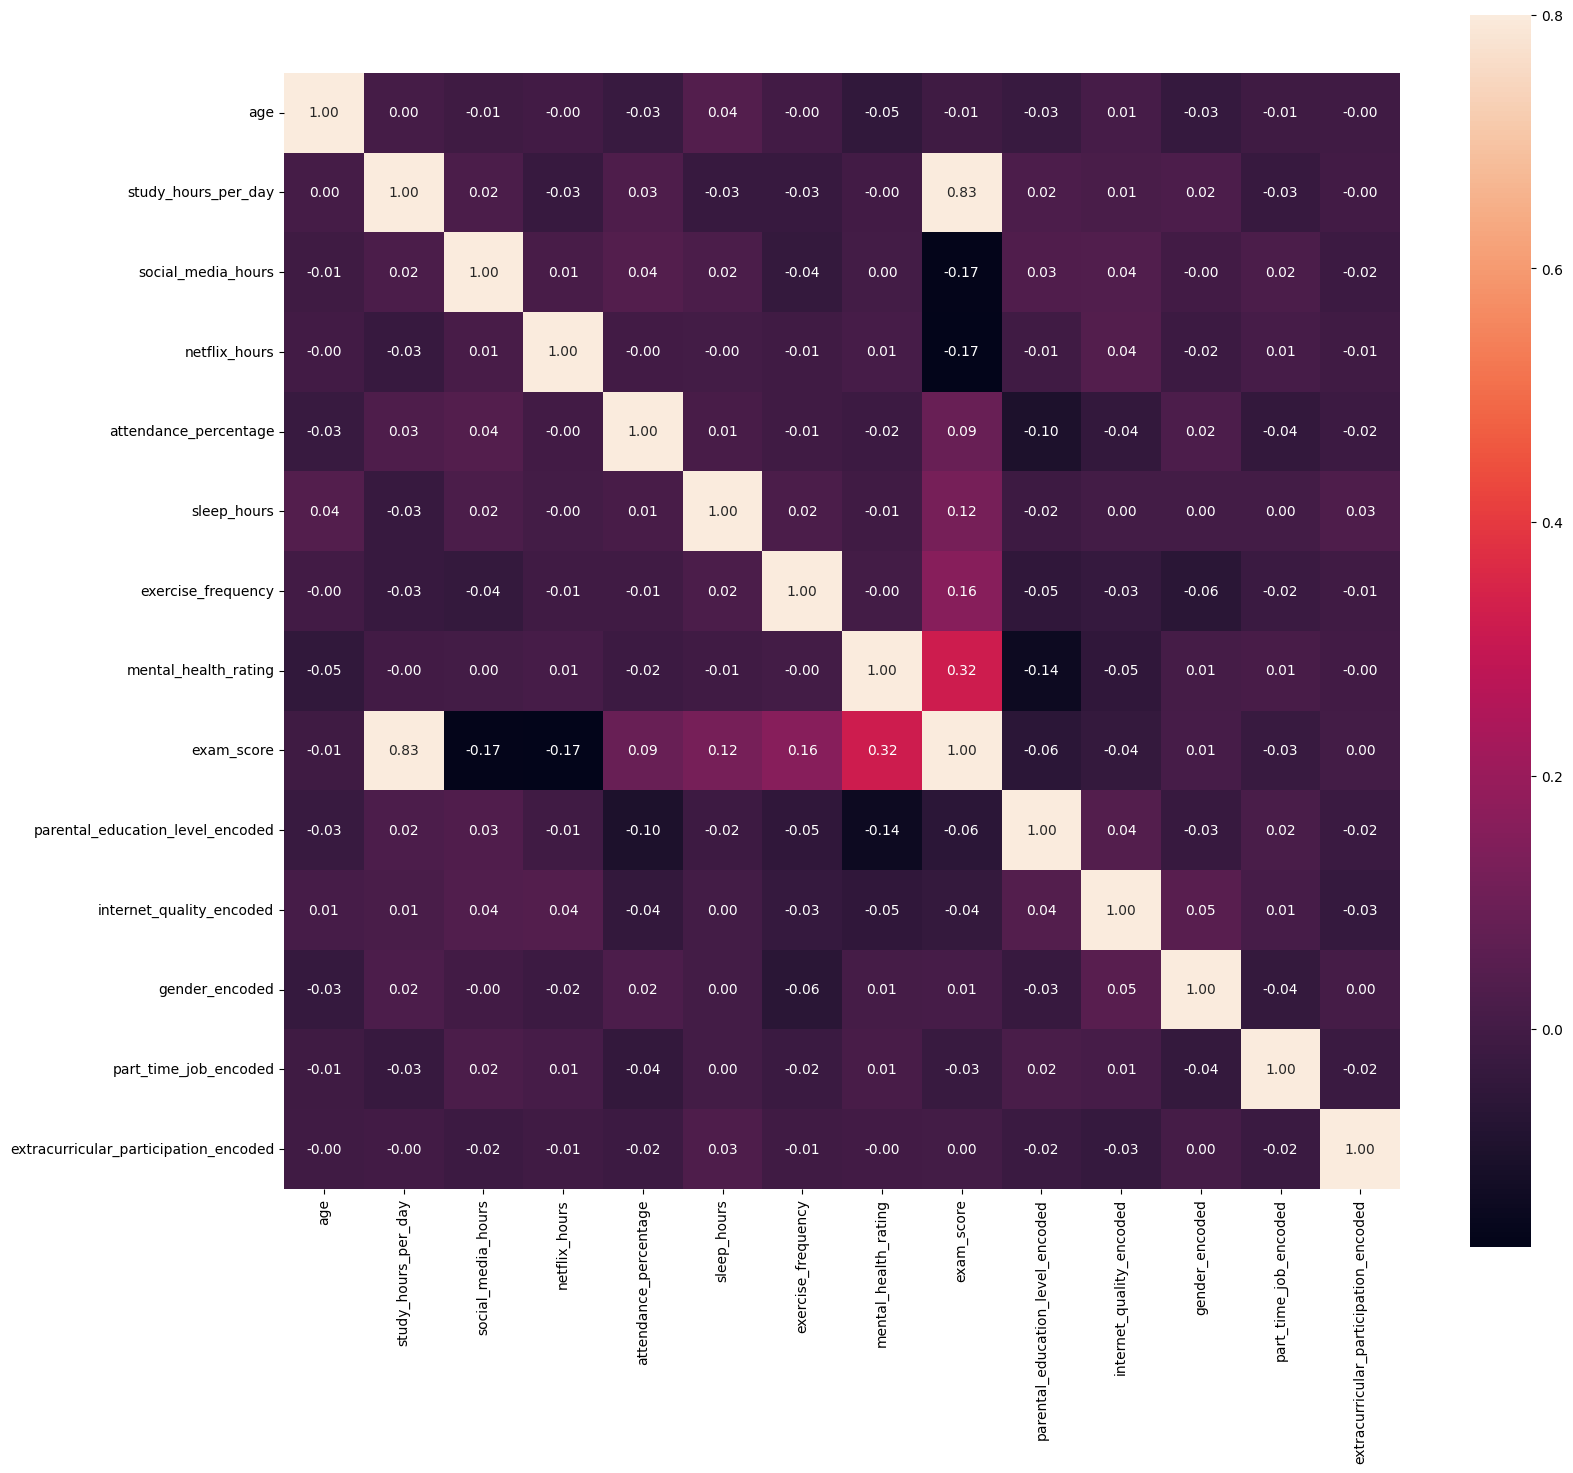

In [8]:
#Matriz de correlação entre as colunas -> target = exam_score
correlation_matrix = df_clean.corr()
fig = plt.figure(figsize = (18,16))
sns.heatmap(correlation_matrix, vmax = 0.8, square = True, annot = True, annot_kws={"size": 10}, fmt=".2f")

# Salvando o gráfico em PDF com alta resolução
plt.savefig('matriz_de_correlacao.pdf', dpi=600)

plt.show()

Mental health e study hours per day têm o maior impacto em exam_score, sendo que as horas estudadas causam mais impacto.

### Questões

1- Qual o fator que otimiza o desempenho escolar?

As horas estudadas diariamente, pois analisando a matriz de correlação e olhando para a linha “exam_score”, vemos que a maior correlação desse atributo, desconsiderando a própria coluna com ela mesma, é “study_hours_per_day” (horas estudadas diariamente).

2- Como é a distribuição da relação entre as horas de estudo diárias e as notas do exame?

C:\Users\Lucas\AppData\Local\Temp\ipykernel_7676\1669924517.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  horasEstudo = df.groupby('grupo_horas')


<BarContainer object of 9 artists>

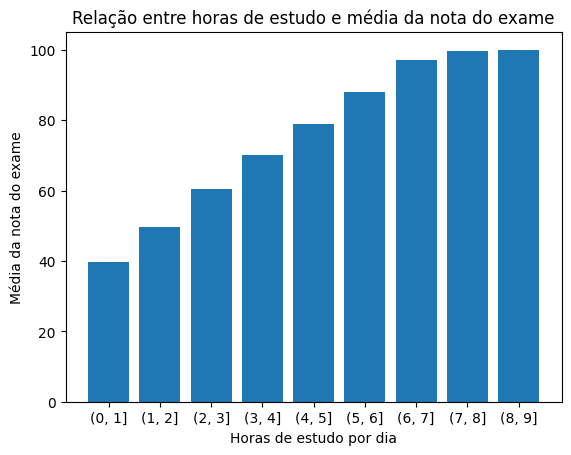

In [9]:
# Separar horas de estudo a cada 1 hora
intervalos = list(range(0, int(np.ceil(df['study_hours_per_day'].max()))+1))
df['grupo_horas'] = pd.cut(df['study_hours_per_day'], bins=intervalos)

# Agrupar pelas horas de estudo
horasEstudo = df.groupby('grupo_horas')

# Calcular média da nota do exame para cada grupo
estudoNota = horasEstudo['exam_score'].mean()

# Separar eixos
x = estudoNota.index.astype(str)
y = estudoNota.values

# Adicionar as informações do gráfico
plt.title('Relação entre horas de estudo e média da nota do exame')
plt.xlabel('Horas de estudo por dia')
plt.ylabel('Média da nota do exame')

# Plotar gráfico
plt.bar(x, y)

Segundo as análises, as médias das notas do exame e as horas de estudo são proporcionais, logo, quanto mais horas estudar, maior a chance de obter uma nota maior.

3- Sabe-se que há alguns fatores que tipicamente afetam o tempo de estudo praticado pelos alunos e, consequentemente, o desempenho dos mesmos. Qual é o impacto visto a respeito do exercício do trabalho e das atividades extracurriculares nas notas dos alunos, no dataset em questão?

<BarContainer object of 2 artists>

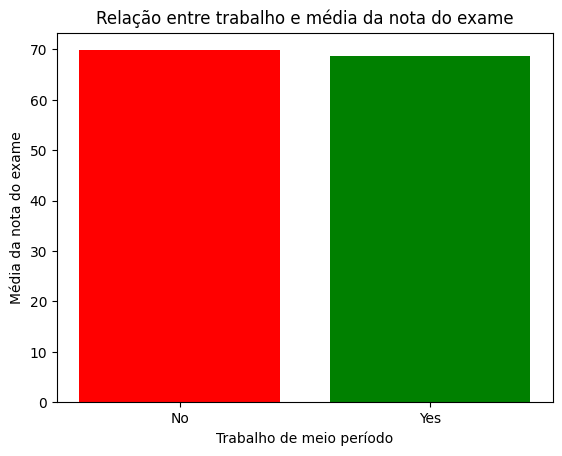

In [10]:
# Agrupar por trabalhar ou não
trabalho = df.groupby('part_time_job')

# Calcular média da nota do exame
trabalhoNota = trabalho['exam_score'].mean()

# Separar eixos
x = trabalhoNota.index
y = trabalhoNota.values

# Adicionar as informações do gráfico
plt.title('Relação entre trabalho e média da nota do exame')
plt.xlabel('Trabalho de meio período')
plt.ylabel('Média da nota do exame')

# Plotar gráfico
plt.bar(x, y, color=['red', 'green'])

<BarContainer object of 2 artists>

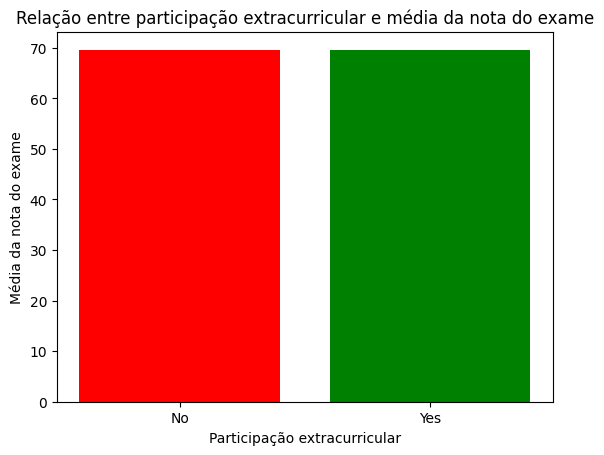

In [11]:
# Agrupar por participação extracurricular
extra = df.groupby('extracurricular_participation')

# Calcular média da nota do exame
extraNota = extra['exam_score'].mean()

# Separar eixos
x = extraNota.index
y = extraNota.values

# Adicionar as informações do gráfico
plt.title('Relação entre participação extracurricular e média da nota do exame')
plt.xlabel('Participação extracurricular')
plt.ylabel('Média da nota do exame')

# Plotar gráfico
plt.bar(x, y, color=['red', 'green'])

Apesar de não haver uma grande diferença da média das notas dos alunos que trabalham e os que não trabalham, percebe-se que os alunos que não trabalham tem uma média maior. Já a média dos alunos que praticam ou não atividades extracurriculares não possuem diferença significativa.


4- A respeito da saúde mental (segundo fator mais importante), como ela impacta no desempenho do aluno?

C:\Users\Lucas\AppData\Local\Temp\ipykernel_7676\2225703769.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupoNotas = df.groupby('grupo_notas')


<BarContainer object of 10 artists>

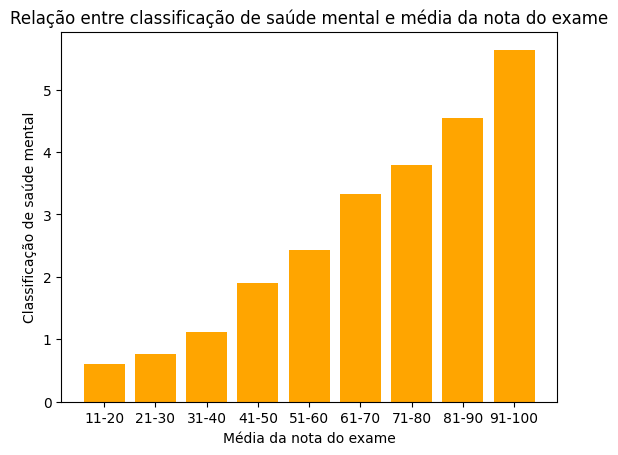

In [12]:
# Separar notas a cada 10 pontos
df['grupo_notas'] = pd.cut(df['exam_score'], bins= list(range(0, 101, 10)))

# Agrupar pelos intervalos de notas
grupoNotas = df.groupby('grupo_notas')

# Calcular média de classificação de saúde mental para cada intervalo de notas
saudeNota = grupoNotas['study_hours_per_day'].mean()

# Separar eixos
x = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
y = saudeNota.values

# Adicionar as informações do gráfico
plt.title('Relação entre classificação de saúde mental e média da nota do exame')
plt.xlabel('Média da nota do exame')
plt.ylabel('Classificação de saúde mental')

# Plotar gráfico
plt.bar(x, y, color=['orange'])

Analisando os dados, quanto maior as médias das notas do exame, maior é a classificação de saúde mental, dessa forma pode se observar que a quanto melhor a saúde mental do aluno, melhor será o seu desempenho.

5- Pensando nos fatores que a impactam, qual o papel do uso das redes sociais? E, mais especificamente, da Netflix?

C:\Users\Lucas\AppData\Local\Temp\ipykernel_7676\3855257895.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  horasMidia = df.groupby('grupo_horas_midia')


<BarContainer object of 8 artists>

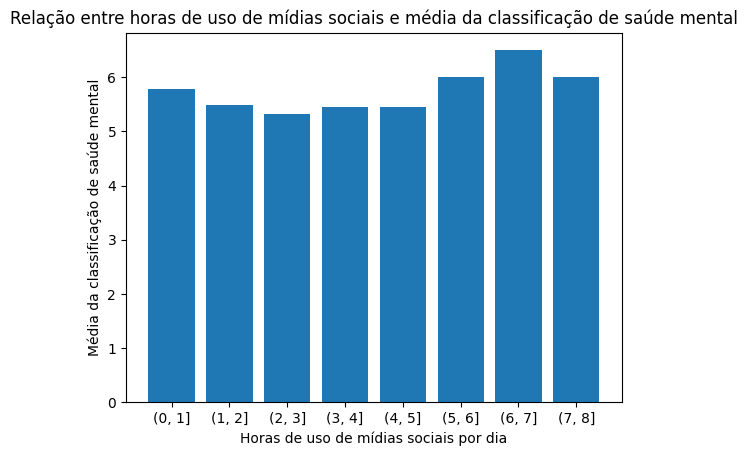

In [13]:
# Separar horas de mídias sociais a cada 1 hora
intervalos = list(range(0, int(np.ceil(df['social_media_hours'].max()))+1))
df['grupo_horas_midia'] = pd.cut(df['social_media_hours'], bins=intervalos)

# Agrupar pelas horas de mídias sociais
horasMidia = df.groupby('grupo_horas_midia')

# Calcular média da classificação de saúde mental para cada grupo
midiaSaude = horasMidia['mental_health_rating'].mean()

# Separar eixos
x = midiaSaude.index.astype(str)
y = midiaSaude.values

# Adicionar as informações do gráfico
plt.title('Relação entre horas de uso de mídias sociais e média da classificação de saúde mental')
plt.xlabel('Horas de uso de mídias sociais por dia')
plt.ylabel('Média da classificação de saúde mental')

# Plotar gráfico
plt.bar(x, y)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_7676\1349320700.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  horasNetflix = df.groupby('grupo_horas_netflix')


<BarContainer object of 6 artists>

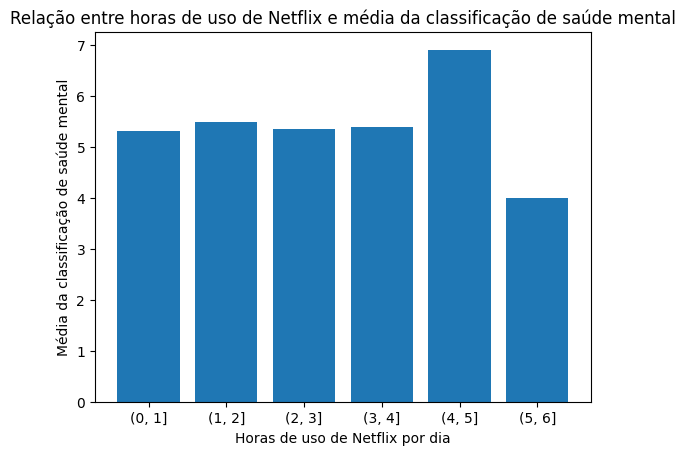

In [14]:
# Separar horas de Netflix a cada 1 hora
intervalos = list(range(0, int(np.ceil(df['netflix_hours'].max()))+1))
df['grupo_horas_netflix'] = pd.cut(df['netflix_hours'], bins=intervalos)

# Agrupar pelas horas de Netflix
horasNetflix = df.groupby('grupo_horas_netflix')

# Calcular média da classificação de saúde mental para cada grupo
netflixSaude = horasNetflix['mental_health_rating'].mean()

# Separar eixos
x = netflixSaude.index.astype(str)
y = netflixSaude.values

# Adicionar as informações do gráfico
plt.title('Relação entre horas de uso de Netflix e média da classificação de saúde mental')
plt.xlabel('Horas de uso de Netflix por dia')
plt.ylabel('Média da classificação de saúde mental')

# Plotar gráfico
plt.bar(x, y)

O tempo de uso das redes sociais não apresenta um grande impacto na classificação da saúde mental. Porém é possível observar que o uso exagerado, em alguns casos, pode sim impactar, como o consumo excessivo de Netflix pode diminuir a qualidade da saúde mental.


6- Voltando a análise para o perfil dos alunos. O gênero causa algum impacto nas notas?

<BarContainer object of 3 artists>

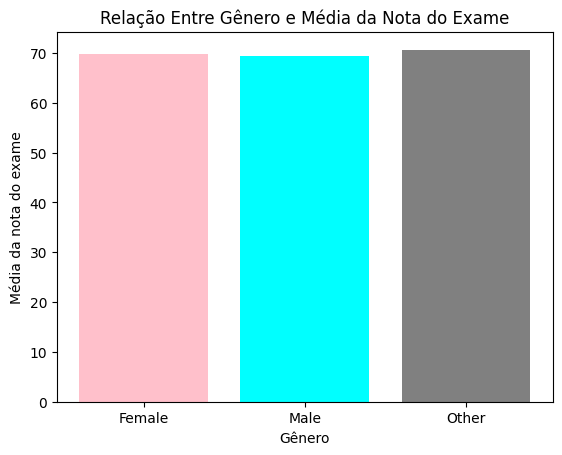

In [15]:
# Agrupar por gênero
genero = df.groupby('gender')

# Calcular média da nota do exame
generoNota = genero['exam_score'].mean()

# Separar eixos
x = generoNota.index
y = generoNota.values

# Adicionar as informações do gráfico
plt.title('Relação Entre Gênero e Média da Nota do Exame')
plt.xlabel('Gênero')
plt.ylabel('Média da nota do exame')

# Plotar gráfico
plt.bar(x, y, color=['pink', 'cyan', 'gray'])

Há uma variação mínima da notas em relação ao gênero, logo não causa impacto significativo.


7- E o nível de escolaridade dos pais ou responsáveis?

<BarContainer object of 3 artists>

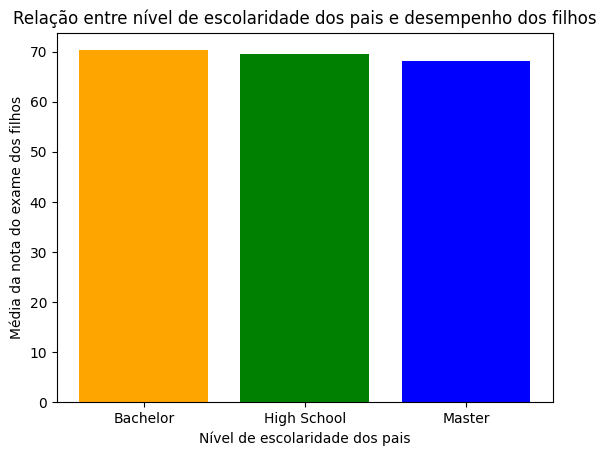

In [16]:
# Agrupar por nível de escolaridade dos pais
escolaridadePais = df.groupby('parental_education_level')

# Calcular média da nota do exame
paisNota = escolaridadePais['exam_score'].mean()

# Separar eixos
x = paisNota.index
y = paisNota.values

# Adicionar as informações do gráfico
plt.title('Relação entre nível de escolaridade dos pais e desempenho dos filhos')
plt.xlabel('Nível de escolaridade dos pais')
plt.ylabel('Média da nota do exame dos filhos')

# Plotar gráfico
plt.bar(x, y, color=['orange', 'green', 'blue'])

Há uma variação mínima da notas em relação ao nível de escolaridade dos pais ou responsáveis, logo não causa impacto significativo.


8- Qual é o impacto da idade dos alunos nas notas do exame? 

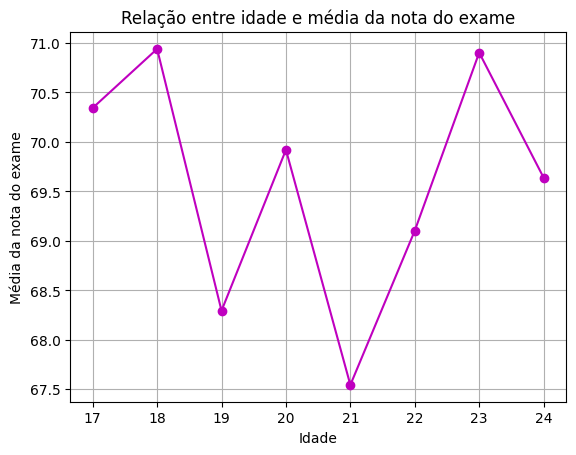

In [17]:
# Agrupar pela idade
idade = df.groupby('age')

# Calcular média da nota do exame para cada grupo
idadeNota = idade['exam_score'].mean()

# Separar eixos
x = idadeNota.index
y = idadeNota.values

# Adicionar as informações do gráfico
plt.title('Relação entre idade e média da nota do exame')
plt.xlabel('Idade')
plt.ylabel('Média da nota do exame')

# Plotar gráfico
plt.plot(x, y, 'o-m')
plt.grid(True)

Há uma pequena variação nas notas do exame em relação à idade dos alunos, não ultrapassando os 3,5 pontos entre a maior e menor média. Logo não impacta significativamente.


9- O acesso à internet, por parte do aluno, e sua qualidade impactam o desempenho? Como?

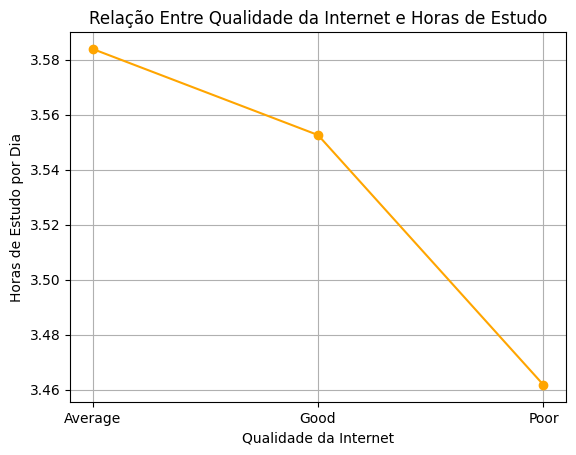

In [18]:
# Agrupar por qualidade da internet
internet = df.groupby('internet_quality')

# Calcular média das horas de estudo
internetEstudo = internet['study_hours_per_day'].mean()

# Separar eixos
x = internetEstudo.index
y = internetEstudo.values

# Adicionar as informações do gráfico
plt.title('Relação Entre Qualidade da Internet e Horas de Estudo')
plt.xlabel('Qualidade da Internet')
plt.ylabel('Horas de Estudo por Dia')

# Plotar gráfico
plt.plot(x, y, marker='o', color='orange')
plt.grid(True)

A qualidade da internet impacta diretamente nas horas de estudo por dia do aluno e, como já foi visto, as horas de estudo por dia são diretamente proporcionais ao desempenho. Dessa forma, quando pior a qualidade da internet, menos horas o aluno conseguirá estudar e pior será seu desempenho.


10- Por fim, qual é a relação de alunos os quais seriam aprovados no Inatel com base em suas notas e frequência? 

C:\Users\Lucas\AppData\Local\Temp\ipykernel_7676\428949477.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aprovados = len(df[df['exam_score']>=60][df['attendance_percentage']>=75])


([<matplotlib.patches.Wedge at 0x1bb12e0e0f0>,
 [Text(-0.34648520416337314, 1.0440057486890892, '% Alunos aprovados'),
  Text(0.34648541988843423, -1.0440056770941122, '% Alunos não aprovados')],
 [Text(-0.18899192954365804, 0.5694576811031395, '60.2%'),
  Text(0.18899204721187318, -0.5694576420513339, '39.8%')])

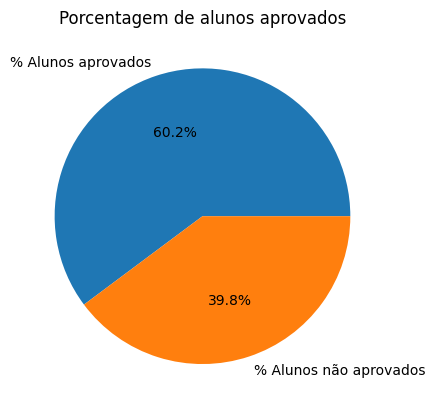

In [19]:
# Separar alunos aprovados e não aprovados
# Aprovado = nota >= 60 e frequência >= 75%
aprovados = len(df[df['exam_score']>=60][df['attendance_percentage']>=75])
naoAprovados = len(df) - aprovados

# Criar e plotar gráfico
plt.title('Porcentagem de alunos aprovados')
plt.pie(x=[aprovados, naoAprovados],
        labels=['% Alunos aprovados', '% Alunos não aprovados'],
        autopct='%1.1f%%')

A relação seria de 60.2% alunos aprovados e 39.8% alunos reprovados.
